# ビデオゲームの分析

## データ読み込み

Pandasを用いて表形式データを読み込みます。

In [0]:
import numpy as np
import pandas as pd

from pathlib import Path

In [111]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# データセット
# https://www.kaggle.com/gregorut/videogamesales/downloads/videogamesales.zip/2

# Googleドライブからコピー
cp -r "/content/drive/My Drive/Sync/東大データサイエンティスト育成講座/Project" ./

In [113]:
ls

drive/  Project/  sample_data/


In [0]:
# この部分は実際にcompetitionフォルダをコピーした先によって異なるため適宜変更が必要
#data_dir = Path("/root/userspace/private/competition2/input/")
data_dir = Path("/content/Project")

In [115]:
df = pd.read_csv(data_dir / "vgsales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## データ確認

カテゴリ変数のようなカラムが確認できるのでいくつカテゴリがあるか確認しましょう。また欠損値や異常な値がないかも確認します。

In [116]:
cols = ["Name", "Platform", "Year","Genre","Publisher"]
nunique = [df[c].nunique() for c in cols]
nunique_df = pd.DataFrame(columns=["nunique"], data=nunique, index=cols)
nunique_df.head()

,nunique
Name,11493
Platform,31
Year,39
Genre,12
Publisher,578


Publisherが結構多い

In [117]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [118]:
#中間値
df.median()

Rank            8300.50
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64

In [119]:
#ピアソン相関係数
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


アメリカとヨーロッパは相関高い。日本はそうでもない

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


YearとPublisherに欠損あり

## データを加工していく

In [121]:
# NAは除外
df.dropna(how='any',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [122]:
# 日本で発売されていないタイトル（JP_Salesが0のタイトル）は今回の対象から除外
df_jp = df[df["JP_Sales"] != 0]
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 0 to 16590
Data columns (total 11 columns):
Rank            6084 non-null int64
Name            6084 non-null object
Platform        6084 non-null object
Year            6084 non-null float64
Genre           6084 non-null object
Publisher       6084 non-null object
NA_Sales        6084 non-null float64
EU_Sales        6084 non-null float64
JP_Sales        6084 non-null float64
Other_Sales     6084 non-null float64
Global_Sales    6084 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 570.4+ KB


約10000タイトル減った

In [123]:
# Yearは一旦strに変換
df_jp.Year = df_jp.Year.astype(str)
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 0 to 16590
Data columns (total 11 columns):
Rank            6084 non-null int64
Name            6084 non-null object
Platform        6084 non-null object
Year            6084 non-null object
Genre           6084 non-null object
Publisher       6084 non-null object
NA_Sales        6084 non-null float64
EU_Sales        6084 non-null float64
JP_Sales        6084 non-null float64
Other_Sales     6084 non-null float64
Global_Sales    6084 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 570.4+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
# Yearはintに変換
#df.Year = df.Year.astype(int)
#df.info()

In [125]:
# Yearは年代ごとに丸めてYears列を追加
df_jp['Years'] = df_jp['Year'].str[0:3] + "0s"
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 0 to 16590
Data columns (total 12 columns):
Rank            6084 non-null int64
Name            6084 non-null object
Platform        6084 non-null object
Year            6084 non-null object
Genre           6084 non-null object
Publisher       6084 non-null object
NA_Sales        6084 non-null float64
EU_Sales        6084 non-null float64
JP_Sales        6084 non-null float64
Other_Sales     6084 non-null float64
Global_Sales    6084 non-null float64
Years           6084 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 617.9+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
# Yearは削除
df_jp = df_jp.drop("Year", axis=1)
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 0 to 16590
Data columns (total 11 columns):
Rank            6084 non-null int64
Name            6084 non-null object
Platform        6084 non-null object
Genre           6084 non-null object
Publisher       6084 non-null object
NA_Sales        6084 non-null float64
EU_Sales        6084 non-null float64
JP_Sales        6084 non-null float64
Other_Sales     6084 non-null float64
Global_Sales    6084 non-null float64
Years           6084 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 570.4+ KB


## 改めて考察

In [127]:
df_jp.head(100)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000s
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990s
5,6,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980s
6,7,New Super Mario Bros.,DS,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000s
7,8,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2000s
8,9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2000s
9,10,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980s


In [128]:
df_jp.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.375346,-0.384960,-0.387923,-0.332872,-0.435833
NA_Sales,-0.375346,1.000000,0.795825,0.474935,0.643713,0.947438
EU_Sales,-0.384960,0.795825,1.000000,0.449267,0.739030,0.913136
JP_Sales,-0.387923,0.474935,0.449267,1.000000,0.285311,0.623817
Other_Sales,-0.332872,0.643713,0.739030,0.285311,1.000000,0.749395
Global_Sales,-0.435833,0.947438,0.913136,0.623817,0.749395,1.000000


日本のマーケットはグローバルの相関はやや低い

In [129]:
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 0 to 16590
Data columns (total 11 columns):
Rank            6084 non-null int64
Name            6084 non-null object
Platform        6084 non-null object
Genre           6084 non-null object
Publisher       6084 non-null object
NA_Sales        6084 non-null float64
EU_Sales        6084 non-null float64
JP_Sales        6084 non-null float64
Other_Sales     6084 non-null float64
Global_Sales    6084 non-null float64
Years           6084 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 570.4+ KB


In [130]:
# 固有値を調べる
cols = ["Rank", "Name", "Platform", "Years","Genre", "Publisher"]
nunique = [df_jp[c].nunique() for c in cols]
nunique_df = pd.DataFrame(columns=["nunique"], data=nunique, index=cols)
nunique_df.head(10)

,nunique
Rank,6084
Name,5224
Platform,30
Years,4
Genre,12
Publisher,303


6084行あるのに、Nameが5224なのはなぜだろう？
Publisher303は多すぎるなあ

In [131]:
# NameでGroupby
df_jp.groupby('Name')["Rank"].count().sort_values(ascending=False)

Name
Warriors Orochi 3                                  5
Dead or Alive 5                                    5
Pro Evolution Soccer 2008                          5
Pro Evolution Soccer 2010                          5
Need for Speed: Most Wanted                        5
Need for Speed: ProStreet                          4
PES 2009: Pro Evolution Soccer                     4
FIFA 14                                            4
The LEGO Movie Videogame                           4
pro evolution soccer 2011                          4
Puyo Puyo Tetris                                   4
Final Fantasy III                                  4
One Piece: Unlimited World Red                     4
2010 FIFA World Cup South Africa                   4
Need for Speed Carbon                              4
Need For Speed: Undercover                         4
Terraria                                           4
Minecraft                                          4
Resident Evil: Revelations               

Nameがかぶってるのはおそらく複数ハードで発売されているやつだろう。ワンホットしたあとにまとめてもいいかも

In [132]:
# メーカーごとの発売本数
df_jp.groupby('Publisher')["Rank"].count().sort_values(ascending=False)

Publisher
Namco Bandai Games                        730
Nintendo                                  625
Konami Digital Entertainment              494
Sega                                      359
Sony Computer Entertainment               293
Tecmo Koei                                272
Capcom                                    247
Electronic Arts                           233
Square Enix                               176
Idea Factory                              122
Ubisoft                                   119
Nippon Ichi Software                       94
D3Publisher                                89
Activision                                 82
Take-Two Interactive                       69
Hudson Soft                                69
Banpresto                                  68
Microsoft Game Studios                     65
5pb                                        61
THQ                                        58
Marvelous Interactive                      51
SquareSoft              

バンナム（英語名だとNamco Bandaiなのか）が1位。本数少ないメーカーはOtherとかに置換したほうがいいかな

In [133]:
# メーカーごとの売上
df_jp.groupby('Publisher')["Global_Sales"].sum().sort_values(ascending=False)


Publisher
Nintendo                                  1755.36
Electronic Arts                            435.14
Sony Computer Entertainment                424.16
Activision                                 302.29
Take-Two Interactive                       249.58
Namco Bandai Games                         216.08
Konami Digital Entertainment               202.88
Microsoft Game Studios                     194.96
Capcom                                     181.37
Ubisoft                                    176.29
Sega                                       167.19
Square Enix                                131.81
THQ                                         88.74
Bethesda Softworks                          59.07
SquareSoft                                  56.56
Atari                                       48.75
Tecmo Koei                                  47.07
Eidos Interactive                           45.94
Warner Bros. Interactive Entertainment      42.50
Enix Corporation                        

任天堂圧勝！下位はほぼ知らないメーカー

##  可視化

各データの分布を可視化して確認します。

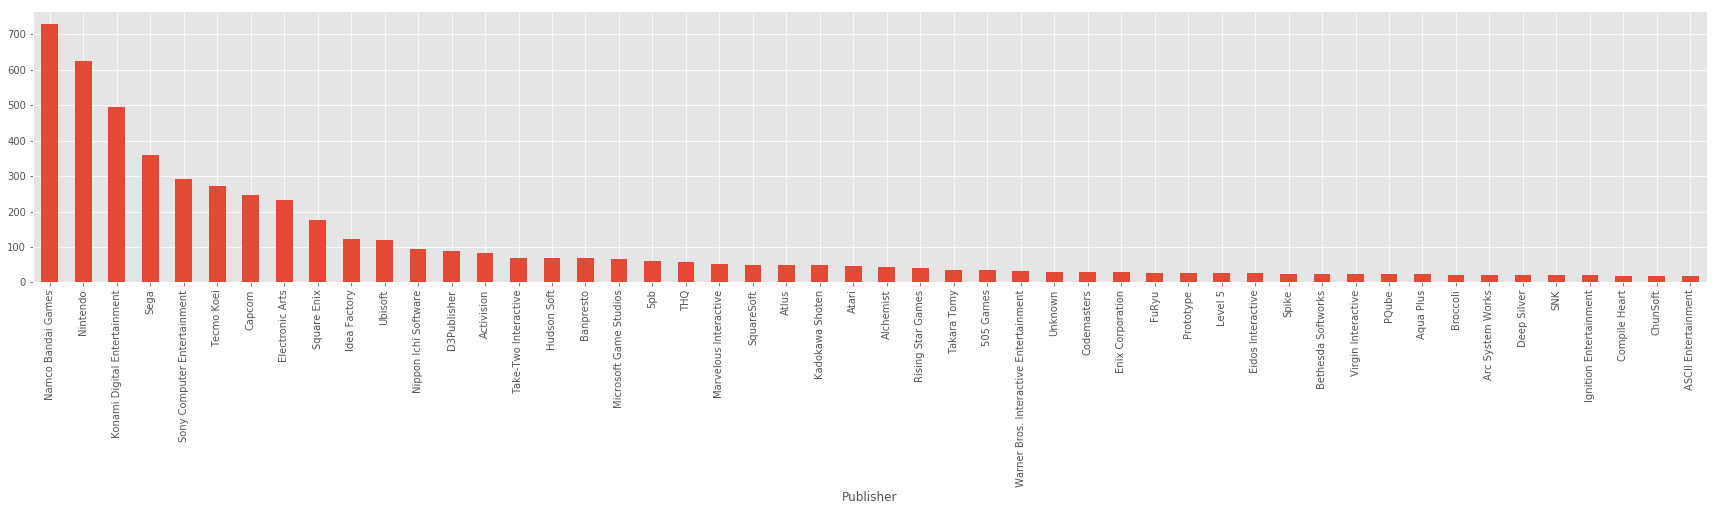

In [134]:
# メーカーごとのタイトル発売数Top50をグラフ化
df_jp.groupby('Publisher')["Rank"].count().sort_values(ascending=False).head(50).plot.bar(figsize=(30,5))

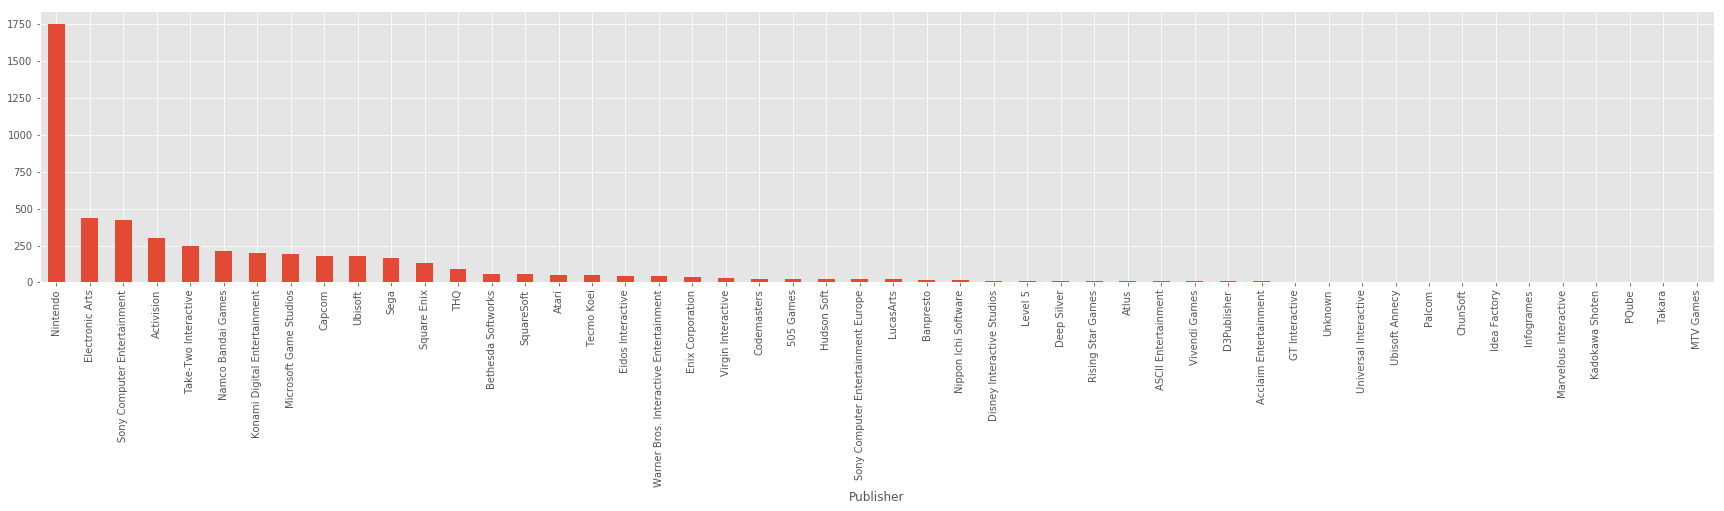

In [135]:
# Top50のグローバルセールスをグラフ化
df_jp.groupby('Publisher')["Global_Sales"].sum().sort_values(ascending=False).head(50).plot.bar(figsize=(30,5))

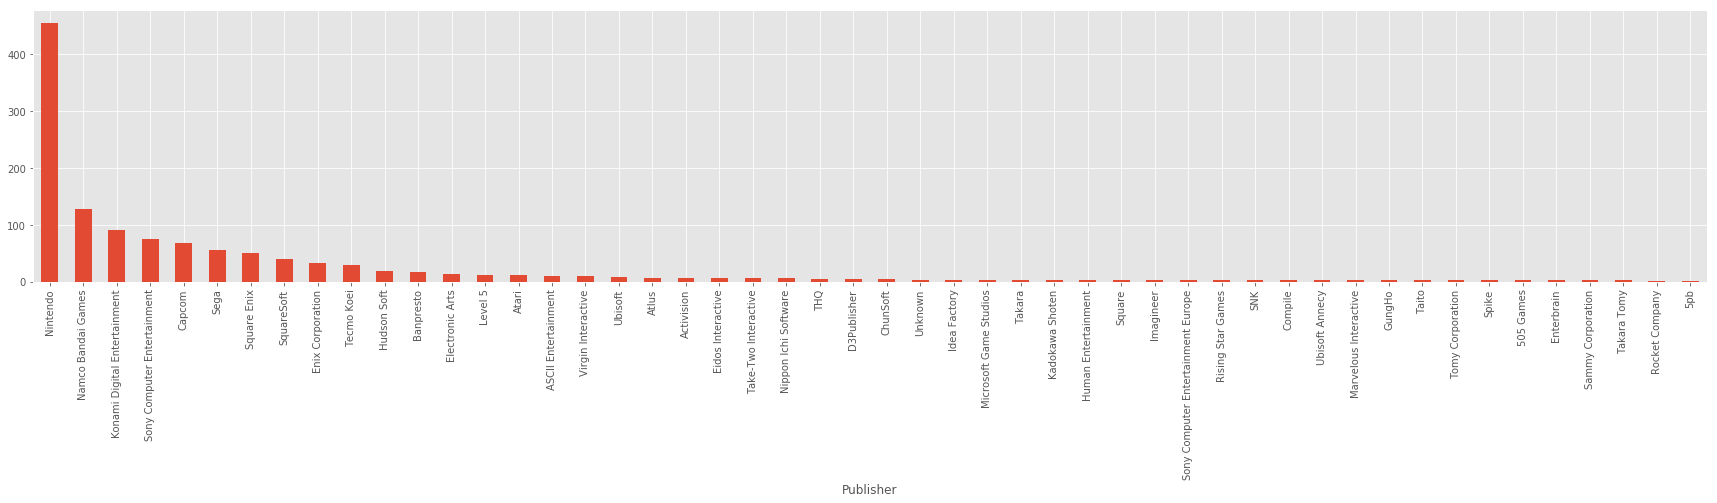

In [136]:
# Top50の日本のセールスをグラフ化
df_jp.groupby('Publisher')["JP_Sales"].sum().sort_values(ascending=False).head(50).plot.bar(figsize=(30,5))

7－9位にスクウェア、スクエニ、エニックスが並んでいる。マージしたほうがいいかも

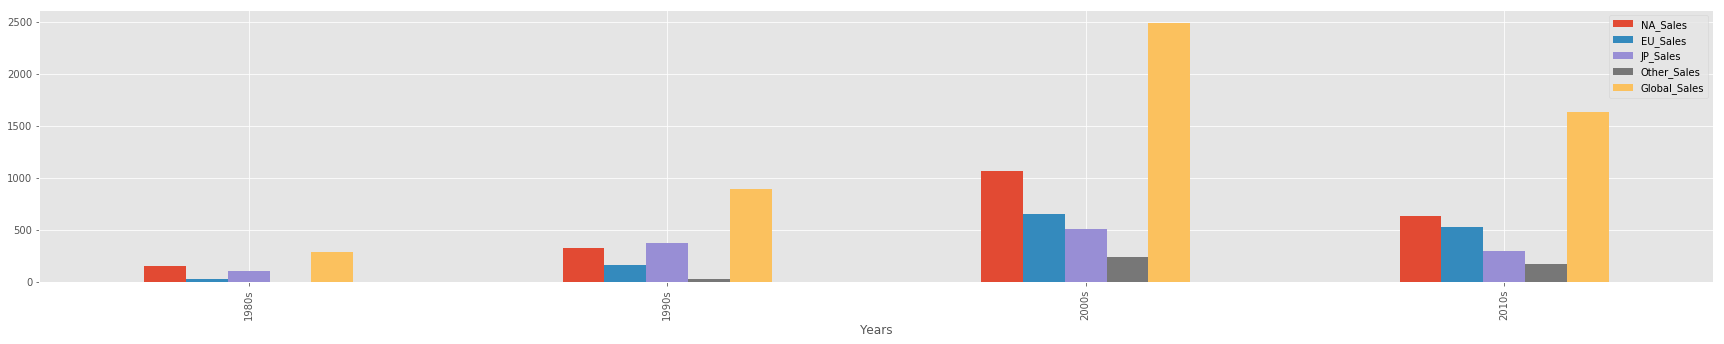

In [137]:
#年代別のセールスをグラフ化
df_jp.groupby('Years')["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"].sum().plot.bar(figsize=(30,5))

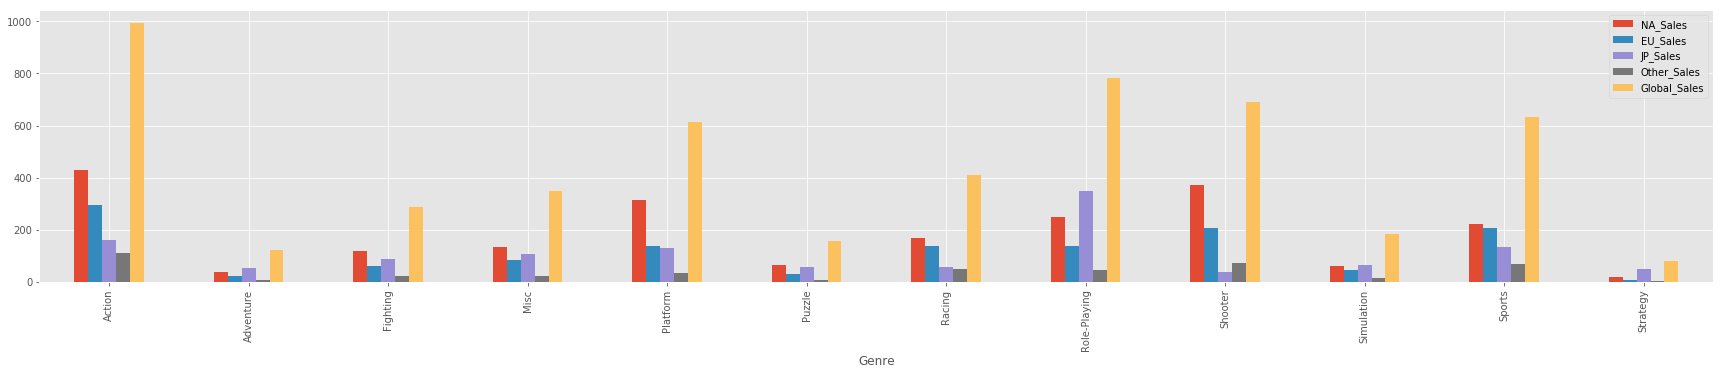

In [138]:
#ジャンル別のセールスをグラフ化
df_jp.groupby('Genre')["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"].sum().plot.bar(figsize=(30,5))

ジャンル別に各地域の人気を比較するなら、スケールをあわせたほうがよさそう

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

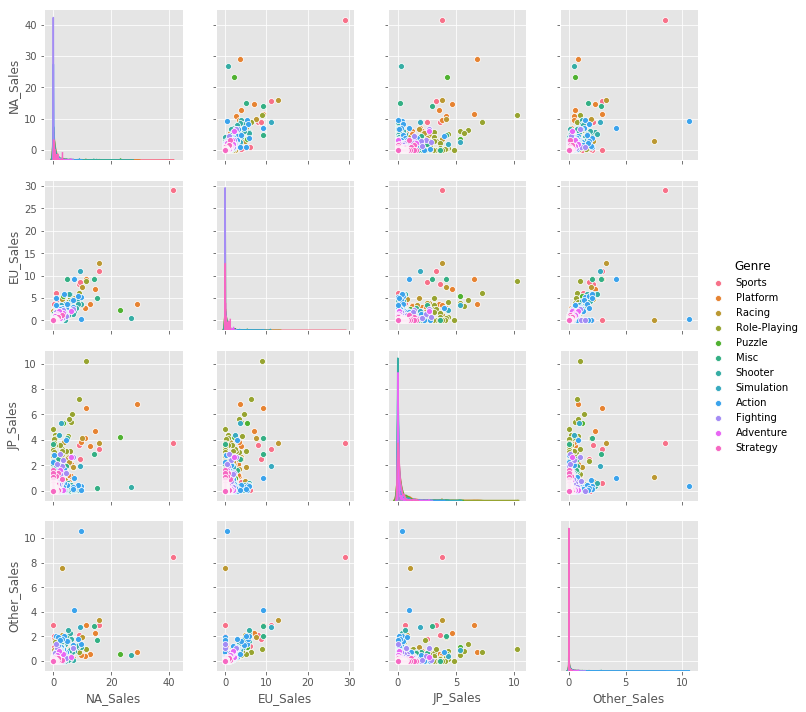

In [140]:
#ジャンル別に分析
sns.pairplot(df_jp,
             hue="Genre",
             vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]);

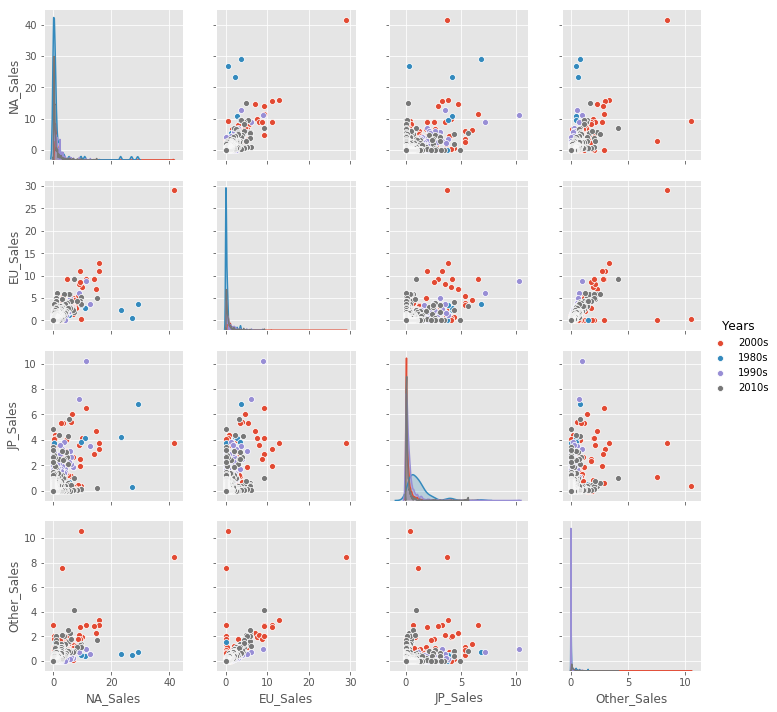

In [141]:
#年代別に分析
sns.pairplot(df_jp,
             hue="Years",
             vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]);

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


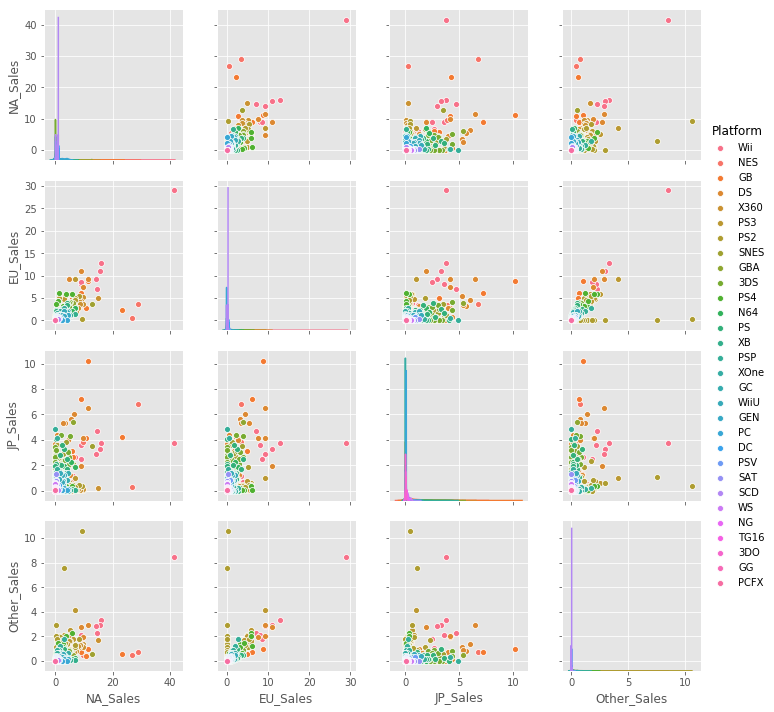

In [142]:
#プラットフォーム別に売上分析
sns.pairplot(df_jp,
             hue="Platform",
             vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]);

左下に固まってて売れてないゲームが大半を占めるということはわかった

## one-hotエンコードする

In [143]:
df_jp.head(10)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000s
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990s
5,6,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980s
6,7,New Super Mario Bros.,DS,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000s
7,8,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2000s
8,9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2000s
9,10,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980s


In [144]:
# one-hotエンコーディングの対象列のセット
ohe_col = ['Genre','Platform','Publisher','Years']

# カテゴリ変数の欠損値はない
df_jp_ohe = pd.get_dummies(df_jp, columns=ohe_col, dummy_na=False)

# one-hotエンコーディング後のデータ形式と中身の確認
print(df_jp_ohe.shape)
print(df_jp_ohe.dtypes)
display(df_jp_ohe.head())

(6084, 356)
Rank                                                  int64
Name                                                 object
NA_Sales                                            float64
EU_Sales                                            float64
JP_Sales                                            float64
Other_Sales                                         float64
Global_Sales                                        float64
Genre_Action                                          uint8
Genre_Adventure                                       uint8
Genre_Fighting                                        uint8
Genre_Misc                                            uint8
Genre_Platform                                        uint8
Genre_Puzzle                                          uint8
Genre_Racing                                          uint8
Genre_Role-Playing                                    uint8
Genre_Shooter                                         uint8
Genre_Simulation            

,Rank,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_505 Games,...,Publisher_TOHO,Publisher_Taito,Publisher_Takara,Publisher_Takara Tomy,Publisher_Take-Two Interactive,Publisher_Takuyo,Publisher_Technos Japan Corporation,Publisher_Tecmo Koei,Publisher_Telltale Games,Publisher_Tetris Online,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Tryfirst,Publisher_Type-Moon,Publisher_UEP Systems,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valve,Publisher_Valve Software,Publisher_Vap,Publisher_Victor Interactive,Publisher_Video System,Publisher_Views,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Warashi,Publisher_Warner Bros. Interactive Entertainment,Publisher_Warp,Publisher_Xing Entertainment,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yamasa Entertainment,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zenrin,Publisher_Zoo Digital Publishing,Publisher_Zushi Games,Publisher_dramatic create,Publisher_fonfun,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Years_1980s,Years_1990s,Years_2000s,Years_2010s
0,1,Wii Sports,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [145]:
#日本の売上と相関が高いものTop20
df_jp_ohe.corr()["JP_Sales"].sort_values(ascending=False).head(20)

JP_Sales                         1.000000
Global_Sales                     0.623817
NA_Sales                         0.474935
EU_Sales                         0.449267
Publisher_Nintendo               0.362706
Other_Sales                      0.285311
Years_1980s                      0.243518
Platform_NES                     0.214401
Platform_GB                      0.175917
Years_1990s                      0.156030
Publisher_Enix Corporation       0.130050
Genre_Platform                   0.119122
Genre_Role-Playing               0.118630
Platform_SNES                    0.118415
Publisher_SquareSoft             0.113594
Platform_PS                      0.075739
Genre_Puzzle                     0.052456
Platform_N64                     0.037684
Publisher_ASCII Entertainment    0.037527
Platform_GBA                     0.035059
Name: JP_Sales, dtype: float64

他地域の売上は除くとして、メーカーは「任天堂」「スクウェア」ジャンルは「RPG」「パズル」などが高い

In [146]:
#アメリカの売上と相関が高いものTOP20
df_jp_ohe.corr()["NA_Sales"].sort_values(ascending=False).head(20)

NA_Sales                            1.000000
Global_Sales                        0.947438
EU_Sales                            0.795825
Other_Sales                         0.643713
JP_Sales                            0.474935
Publisher_Nintendo                  0.243528
Publisher_Activision                0.148246
Years_1980s                         0.136183
Genre_Platform                      0.133264
Genre_Shooter                       0.129111
Publisher_Take-Two Interactive      0.126314
Publisher_Microsoft Game Studios    0.125669
Platform_X360                       0.116070
Platform_NES                        0.094845
Platform_Wii                        0.090946
Platform_GB                         0.081564
Publisher_Electronic Arts           0.064047
Genre_Racing                        0.058657
Platform_N64                        0.050334
Publisher_Bethesda Softworks        0.041864
Name: NA_Sales, dtype: float64

任天堂は当然として、Activisionは知らん。ジャンルもシューティングとかが人気っぽい（RPGは入ってこない）

## さらに処理

In [0]:
#同一タイトルの複数ハードはマージする
#df_jp_ohe.groupby('Name').sum()

one-hotして2とか3とかになった部分の処理を1に置換しなおしたりとか面倒だからやっぱやめた

## 重回帰でモデルを作る

やりたいこと。
他地域の売上（グローバル売上は日本の売上が入ってしまっているので使わない）、メーカー、ジャンル、年代、ハードからJP_Salesを予測する

In [148]:
# XとY（JP_Sales）に分割
y = df_jp_ohe.JP_Sales
X = df_jp_ohe.drop(["Name","JP_Sales","Global_Sales","Rank"], axis=1)

print(y.head(10))
print(X.head(10))

0     3.77
1     6.81
2     3.79
3     3.28
4    10.22
5     4.22
6     6.50
7     2.93
8     4.70
9     0.28
Name: JP_Sales, dtype: float64
   NA_Sales  EU_Sales  Other_Sales  Genre_Action  Genre_Adventure  \
0     41.49     29.02         8.46             0                0   
1     29.08      3.58         0.77             0                0   
2     15.85     12.88         3.31             0                0   
3     15.75     11.01         2.96             0                0   
4     11.27      8.89         1.00             0                0   
5     23.20      2.26         0.58             0                0   
6     11.38      9.23         2.90             0                0   
7     14.03      9.20         2.85             0                0   
8     14.59      7.06         2.26             0                0   
9     26.93      0.63         0.47             0                0   

   Genre_Fighting  Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  \
0               0     

In [0]:
# ライブラリ読み込み
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True)


X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

lr = LinearRegression()
lr.fit(X_train, y_train);

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(lr.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(lr.score(X_test,y_test)))
 
# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(lr.coef_, index=X.columns)))
print('切片: {:.3f}'.format(lr.intercept_))

#print(X_train)
#print(y_train)
#print(X_test)
print(y_test)

決定係数(train):0.488
決定係数(test):-146351044483208822784.000

回帰係数
NA_Sales                                            9.098706e-02
EU_Sales                                            3.144236e-01
Other_Sales                                        -4.725914e-01
Genre_Action                                       -1.584332e+11
Genre_Adventure                                    -1.584332e+11
Genre_Fighting                                     -1.584332e+11
Genre_Misc                                         -1.584332e+11
Genre_Platform                                     -1.584332e+11
Genre_Puzzle                                       -1.584332e+11
Genre_Racing                                       -1.584332e+11
Genre_Role-Playing                                 -1.584332e+11
Genre_Shooter                                      -1.584332e+11
Genre_Simulation                                   -1.584332e+11
Genre_Sports                                       -1.584332e+11
Genre_Strategy              

In [151]:
# 決定係数のtestが悪すぎるからJP_Salesとの相関が0.1以上の列のみでモデルを再作成

# XとY（JP_Sales）に分割
y = df_jp_ohe.JP_Sales
X = df_jp_ohe[["NA_Sales","EU_Sales","Other_Sales","Publisher_Nintendo","Publisher_Enix Corporation","Publisher_SquareSoft","Platform_NES","Platform_GB","Platform_SNES","Genre_Platform","Genre_Role-Playing","Years_1980s","Years_1990s"]]
#X = df_jp_ohe[["NA_Sales","EU_Sales","Other_Sales","Publisher_Nintendo","Publisher_Enix Corporation","Platform_NES","Platform_GB","Genre_Platform","Genre_Role-Playing","Years_1980s","Years_1990s"]]

print(y.head(10))
print(X.head(10))

0     3.77
1     6.81
2     3.79
3     3.28
4    10.22
5     4.22
6     6.50
7     2.93
8     4.70
9     0.28
Name: JP_Sales, dtype: float64
   NA_Sales  EU_Sales  Other_Sales  Publisher_Nintendo  \
0     41.49     29.02         8.46                   1   
1     29.08      3.58         0.77                   1   
2     15.85     12.88         3.31                   1   
3     15.75     11.01         2.96                   1   
4     11.27      8.89         1.00                   1   
5     23.20      2.26         0.58                   1   
6     11.38      9.23         2.90                   1   
7     14.03      9.20         2.85                   1   
8     14.59      7.06         2.26                   1   
9     26.93      0.63         0.47                   1   

   Publisher_Enix Corporation  Publisher_SquareSoft  Platform_NES  \
0                           0                     0             0   
1                           0                     0             1   
2            

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True)


X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

lr = LinearRegression()
lr.fit(X_train, y_train);

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(lr.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(lr.score(X_test,y_test)))
 
# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(lr.coef_, index=X.columns)))
print('切片: {:.3f}'.format(lr.intercept_))

#print(X_train)
#print(y_train)
#print(X_test)
print(y_test)

決定係数(train):0.433
決定係数(test):0.151

回帰係数
NA_Sales                      0.078739
EU_Sales                      0.306851
Other_Sales                  -0.490900
Publisher_Nintendo            0.331605
Publisher_Enix Corporation    0.862298
Publisher_SquareSoft          0.441834
Platform_NES                  0.173273
Platform_GB                   0.255224
Platform_SNES                 0.164338
Genre_Platform               -0.019593
Genre_Role-Playing            0.153306
Years_1980s                   0.540756
Years_1990s                   0.125498
dtype: float64
切片: 0.042
[0.22 0.05 0.05 ... 0.02 0.04 0.01]


だいぶマシになったけど、イマイチ

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rmsle(pred, ans):
    return np.sqrt(np.square(np.log1p(pred) - np.log1p(ans)).mean())
 
def rmse(pred, ans):
    return np.sqrt(mean_squared_error(pred, ans))

def r2_score(pred, ans):
    return r2_score(pred, ans)

In [0]:
pred = lr.predict(X_test)

# 負値が入ると問題なので負値は丸める
pred = np.where(pred < 0.0, 0.0, pred)

In [155]:
print("Eval RMSLE: {:.4f}".format(rmsle(pred, y_test)))
print("Eval RMSE: {:.4f}".format(rmse(pred, y_test)))
#print("Eval R2_SCORE: {:.4f}".format(r2_score(pred, y_test)))

Eval RMSLE: 0.1998
Eval RMSE: 0.3501


RMSEが0.3501ならまあよさそう

## 他の回帰モデルも試す

In [156]:
# インポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# モデルの設定
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(random_state=0)
}

# 評価値の計算
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'RMSE')] = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    scores[(model_name, 'RMSLE')] = np.sqrt(np.square(np.log1p(y_test) - np.log1p(model.predict(X_test))).mean())
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))

#表示
pd.Series(scores).unstack()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,MAE,MSE,MedAE,R2,RMSE,RMSLE
DecisionTreeRegressor,0.177941,0.188166,0.065925,0.272592,0.433781,0.206980
LinearRegression,0.178273,0.155288,0.083344,0.399690,0.394066,0.189037
LinearSVR,0.157173,0.193964,0.050000,0.250177,0.440414,0.192466
Ridge,0.178266,0.155280,0.083300,0.399723,0.394056,0.189025


R2スコアやRMSEはリッジ回帰が高いが、重回帰でも大差ない

In [0]:
#リッジ・ラッソ回帰用のクラス
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
#y = df_jp_ohe.JP_Sales
#X = df_jp_ohe[["NA_Sales","EU_Sales","Other_Sales","Publisher_Nintendo","Publisher_Enix Corporation","Publisher_SquareSoft","Platform_NES","Platform_GB","Platform_SNES","Genre_Platform","Genre_Role-Playing","Years_1980s","Years_1990s"]]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築と評価
#lr = LinearRegression()
#rg = Ridge(random_state=0)
#ls1 = Lasso(alpha=1.0, random_state=0)
#ls2 = Lasso(alpha=200.0, random_state=0)

#for model in [lr, rg, ls1, ls2]:
#    model.fit(X_train,y_train)
#    print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_train,y_train)))
#    print('{}(test):{:.6f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

## 分類モデルを試す
やりたいこと。各指標から任天堂が発売したゲームを当てる

In [158]:
pd.set_option('display.max_columns', 100)
# XとY（Publisher_Nintendo）に分割
y = df_jp_ohe.Publisher_Nintendo
X_temp = df_jp_ohe.drop(df_jp_ohe.columns[49:352], axis=1) #Publisher列を全削除
X = X_temp.drop(["Rank","Name"],axis=1)

print(y.head(20))
print(X.head(20))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    1
19    1
Name: Publisher_Nintendo, dtype: uint8
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Genre_Action  \
0      41.49     29.02      3.77         8.46         82.74             0   
1      29.08      3.58      6.81         0.77         40.24             0   
2      15.85     12.88      3.79         3.31         35.82             0   
3      15.75     11.01      3.28         2.96         33.00             0   
4      11.27      8.89     10.22         1.00         31.37             0   
5      23.20      2.26      4.22         0.58         30.26             0   
6      11.38      9.23      6.50         2.90         30.01             0   
7      14.03      9.20      2.93         2.85         29.02             0   
8      14.59      7.06      4.70         2.26         28.62             0   
9      26.93      0.63      0.2

In [159]:
print("任天堂のタイトル数：",y.sum())
print("全タイトル数：",y.count())
print("任天堂タイトルの比率：", y.sum() / y.count())

任天堂のタイトル数： 625
全タイトル数： 6084
任天堂タイトルの比率： 0.1027284681130835


だいたい1割が任天堂のタイトル。これをあてられるか？？

In [160]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.933
正解率(test):0.917


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


いきなり正解率高め

In [161]:
# 混同行列を作る
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confution matrix:\n{}'.format(m))

# 見にくいので並び替え
print("Confution matrix（左上がTrue-Positiveになるよう並び替え）")
print(np.flip(m))

Confution matrix:
[[2674   50]
 [ 204  114]]
Confution matrix（左上がTrue-Positiveになるよう並び替え）
[[ 114  204]
 [  50 2674]]


In [162]:
#F1スコアを算出
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

適合率:0.695
再現率:0.358
F1値:0.473


これをみると、True Negativeが多いから正解率が高いだけで、モデルとしてはイマイチ

## 分析しなおし

In [163]:
# 特徴量を選択してみる
from sklearn.feature_selection import RFE

# 特徴選択のためのrfeインスタンスの学習
rfe = RFE(estimator=LogisticRegression(random_state=0),
          n_features_to_select=10, # 残したい特徴量数を指定
          step=.05) # 特徴量を何個ずつ削除するか（少数の場合は削除割合を表す）
rfe.fit(X, y)

print('選択された特徴量の位置：', rfe.support_)
print('選択された特徴量の数：', rfe.support_.sum())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

選択された特徴量の位置： [False False  True False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False  True  True  True  True  True
  True  True False False False False False False  True False False False
 False False False]
選択された特徴量の数： 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [164]:
X_feature = pd.DataFrame(rfe.transform(X), columns=X.columns.values[rfe.support_])
print(X_feature.shape)
display(X_feature.head())

(6084, 10)


,JP_Sales,Platform_DC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_X360
0,3.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


上記をみて気づいた。任天堂のタイトルはプレステやXBoxで発売されないから、これが特徴量として取り出される

In [165]:
# 相関が高い順
df_jp_ohe.corr()["Publisher_Nintendo"].sort_values(ascending=False).head(20)

Publisher_Nintendo    1.000000
JP_Sales              0.362706
Global_Sales          0.269225
NA_Sales              0.243528
Platform_GB           0.216261
Platform_GBA          0.212256
Genre_Platform        0.205222
EU_Sales              0.187533
Genre_Puzzle          0.176402
Years_1980s           0.175029
Platform_WiiU         0.159676
Platform_N64          0.158253
Platform_NES          0.152649
Platform_GC           0.150766
Platform_Wii          0.120443
Platform_3DS          0.095431
Platform_DS           0.092901
Other_Sales           0.086741
Genre_Misc            0.062246
Years_2000s           0.043049
Name: Publisher_Nintendo, dtype: float64

In [166]:
# 相関が低い順
df_jp_ohe.corr()["Publisher_Nintendo"].sort_values(ascending=True).head(20)

Rank                                     -0.280078
Platform_PS2                             -0.130423
Platform_PSP                             -0.127745
Publisher_Namco Bandai Games             -0.124941
Platform_PS3                             -0.122301
Years_2010s                              -0.101686
Publisher_Konami Digital Entertainment   -0.100587
Platform_PS                              -0.089881
Platform_X360                            -0.086226
Publisher_Sega                           -0.084731
Platform_PSV                             -0.082322
Genre_Adventure                          -0.077754
Publisher_Sony Computer Entertainment    -0.076110
Publisher_Tecmo Koei                     -0.073199
Publisher_Capcom                         -0.069604
Publisher_Electronic Arts                -0.067522
Genre_Action                             -0.067400
Genre_Fighting                           -0.064443
Platform_PS4                             -0.062221
Publisher_Square Enix          

## 改めて分類モデル作成

In [167]:
# Xを相関が0.1以上のものに限定
y = df_jp_ohe.Publisher_Nintendo
X = df_jp_ohe[["JP_Sales","Global_Sales","NA_Sales","EU_Sales","Platform_GB","Platform_GBA","Platform_WiiU","Platform_GC","Platform_Wii","Platform_NES","Platform_N64","Genre_Platform","Genre_Puzzle","Years_1980s"]]

print(y.head(20))
print(X.head(20))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    1
19    1
Name: Publisher_Nintendo, dtype: uint8
    JP_Sales  Global_Sales  NA_Sales  EU_Sales  Platform_GB  Platform_GBA  \
0       3.77         82.74     41.49     29.02            0             0   
1       6.81         40.24     29.08      3.58            0             0   
2       3.79         35.82     15.85     12.88            0             0   
3       3.28         33.00     15.75     11.01            0             0   
4      10.22         31.37     11.27      8.89            1             0   
5       4.22         30.26     23.20      2.26            1             0   
6       6.50         30.01     11.38      9.23            0             0   
7       2.93         29.02     14.03      9.20            0             0   
8       4.70         28.62     14.59      7.06            0             0   
9       0.28         28.31     

In [168]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.925
正解率(test):0.911


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [169]:
# 混同行列を作る
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confution matrix:\n{}'.format(m))

# 見にくいので並び替え
print("Confution matrix（左上がTrue-Positiveになるよう並び替え）")
print(np.flip(m))

Confution matrix:
[[2671   53]
 [ 219   99]]
Confution matrix（左上がTrue-Positiveになるよう並び替え）
[[  99  219]
 [  53 2671]]


In [170]:
#F1スコアを算出
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

適合率:0.651
再現率:0.311
F1値:0.421


下がってしまったorz

## 任天堂ハード 1 or 0 のカラムを作る

In [171]:
# XとY（Publisher_Nintendo）に分割
y = df_jp_ohe.Publisher_Nintendo
X_temp = df_jp_ohe.drop(df_jp_ohe.columns[49:352], axis=1) #Publisher列を全削除
X = X_temp.drop(["Rank","Name"],axis=1)

print(y.head(20))
print(X.head(20))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    1
19    1
Name: Publisher_Nintendo, dtype: uint8
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Genre_Action  \
0      41.49     29.02      3.77         8.46         82.74             0   
1      29.08      3.58      6.81         0.77         40.24             0   
2      15.85     12.88      3.79         3.31         35.82             0   
3      15.75     11.01      3.28         2.96         33.00             0   
4      11.27      8.89     10.22         1.00         31.37             0   
5      23.20      2.26      4.22         0.58         30.26             0   
6      11.38      9.23      6.50         2.90         30.01             0   
7      14.03      9.20      2.93         2.85         29.02             0   
8      14.59      7.06      4.70         2.26         28.62             0   
9      26.93      0.63      0.2

In [172]:
# Platform_Nintendo列を追加
X['Platform_Nintendo'] = '0'
X.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Years_1980s,Years_1990s,Years_2000s,Years_2010s,Platform_Nintendo
0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,23.20,2.26,4.22,0.58,30.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,11.38,9.23,6.50,2.90,30.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,14.03,9.20,2.93,2.85,29.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8,14.59,7.06,4.70,2.26,28.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9,26.93,0.63,0.28,0.47,28.31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
# 任天堂ハードフラグをひたすらいれる
X.loc[X['Platform_NES'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_SNES'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_3DS'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_GC'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_DS'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_GB'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_GBA'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_N64'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_Wii'] == 1, 'Platform_Nintendo'] = '1'
X.loc[X['Platform_WiiU'] == 1, 'Platform_Nintendo'] = '1'

In [174]:
X.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Years_1980s,Years_1990s,Years_2000s,Years_2010s,Platform_Nintendo
0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,23.20,2.26,4.22,0.58,30.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,11.38,9.23,6.50,2.90,30.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7,14.03,9.20,2.93,2.85,29.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
8,14.59,7.06,4.70,2.26,28.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
9,26.93,0.63,0.28,0.47,28.31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [175]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 0 to 16590
Data columns (total 52 columns):
NA_Sales              6084 non-null float64
EU_Sales              6084 non-null float64
JP_Sales              6084 non-null float64
Other_Sales           6084 non-null float64
Global_Sales          6084 non-null float64
Genre_Action          6084 non-null uint8
Genre_Adventure       6084 non-null uint8
Genre_Fighting        6084 non-null uint8
Genre_Misc            6084 non-null uint8
Genre_Platform        6084 non-null uint8
Genre_Puzzle          6084 non-null uint8
Genre_Racing          6084 non-null uint8
Genre_Role-Playing    6084 non-null uint8
Genre_Shooter         6084 non-null uint8
Genre_Simulation      6084 non-null uint8
Genre_Sports          6084 non-null uint8
Genre_Strategy        6084 non-null uint8
Platform_3DO          6084 non-null uint8
Platform_3DS          6084 non-null uint8
Platform_DC           6084 non-null uint8
Platform_DS           6084 non-null uint8


In [176]:
# 型変換
X['Platform_Nintendo'] = X['Platform_Nintendo'].astype('u1')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 0 to 16590
Data columns (total 52 columns):
NA_Sales              6084 non-null float64
EU_Sales              6084 non-null float64
JP_Sales              6084 non-null float64
Other_Sales           6084 non-null float64
Global_Sales          6084 non-null float64
Genre_Action          6084 non-null uint8
Genre_Adventure       6084 non-null uint8
Genre_Fighting        6084 non-null uint8
Genre_Misc            6084 non-null uint8
Genre_Platform        6084 non-null uint8
Genre_Puzzle          6084 non-null uint8
Genre_Racing          6084 non-null uint8
Genre_Role-Playing    6084 non-null uint8
Genre_Shooter         6084 non-null uint8
Genre_Simulation      6084 non-null uint8
Genre_Sports          6084 non-null uint8
Genre_Strategy        6084 non-null uint8
Platform_3DO          6084 non-null uint8
Platform_3DS          6084 non-null uint8
Platform_DC           6084 non-null uint8
Platform_DS           6084 non-null uint8


In [177]:
X["Platform_Nintendo"].sum()

2192

In [178]:
# Platformカラムを削除
X = X.drop(X.columns[17:47], axis=1) #Platform列を全削除
X.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Years_1980s,Years_1990s,Years_2000s,Years_2010s,Platform_Nintendo
0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
5,23.20,2.26,4.22,0.58,30.26,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
6,11.38,9.23,6.50,2.90,30.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
7,14.03,9.20,2.93,2.85,29.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
8,14.59,7.06,4.70,2.26,28.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
9,26.93,0.63,0.28,0.47,28.31,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [179]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.930
正解率(test):0.915


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [180]:
# 混同行列を作る
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confution matrix:\n{}'.format(m))

# 見にくいので並び替え
print("Confution matrix（左上がTrue-Positiveになるよう並び替え）")
print(np.flip(m))

Confution matrix:
[[2690   34]
 [ 226   92]]
Confution matrix（左上がTrue-Positiveになるよう並び替え）
[[  92  226]
 [  34 2690]]


In [181]:
#F1スコアを算出
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

適合率:0.730
再現率:0.289
F1値:0.414


orz

## いっそ任天堂ハード以外の行を削除する作戦

In [0]:
# 任天堂ハードフラグをひたすらいれる
df_jp_ohe.loc[df_jp_ohe['Platform_NES'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_SNES'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_3DS'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_GC'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_DS'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_GB'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_GBA'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_N64'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_Wii'] == 1, 'Platform_Nintendo'] = '1'
df_jp_ohe.loc[df_jp_ohe['Platform_WiiU'] == 1, 'Platform_Nintendo'] = '1'

In [0]:
 df_jp_ohe_nintendo = df_jp_ohe[df_jp_ohe.Platform_Nintendo == '1']

In [184]:
df_jp_ohe_nintendo.head(20)

,Rank,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_505 Games,...,Publisher_Taito,Publisher_Takara,Publisher_Takara Tomy,Publisher_Take-Two Interactive,Publisher_Takuyo,Publisher_Technos Japan Corporation,Publisher_Tecmo Koei,Publisher_Telltale Games,Publisher_Tetris Online,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Tryfirst,Publisher_Type-Moon,Publisher_UEP Systems,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valve,Publisher_Valve Software,Publisher_Vap,Publisher_Victor Interactive,Publisher_Video System,Publisher_Views,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Warashi,Publisher_Warner Bros. Interactive Entertainment,Publisher_Warp,Publisher_Xing Entertainment,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yamasa Entertainment,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zenrin,Publisher_Zoo Digital Publishing,Publisher_Zushi Games,Publisher_dramatic create,Publisher_fonfun,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Years_1980s,Years_1990s,Years_2000s,Years_2010s,Platform_Nintendo
0,1,Wii Sports,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,3,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,4,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,5,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,6,Tetris,23.20,2.26,4.22,0.58,30.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,7,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7,8,Wii Play,14.03,9.20,2.93,2.85,29.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,9,New Super Mario Bros. Wii,14.59,7.06,4.70,2.26,28.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9,10,Duck Hunt,26.93,0.63,0.28,0.47,28.31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [185]:
df_jp_ohe_nintendo.count()

Rank                                                2192
Name                                                2192
NA_Sales                                            2192
EU_Sales                                            2192
JP_Sales                                            2192
Other_Sales                                         2192
Global_Sales                                        2192
Genre_Action                                        2192
Genre_Adventure                                     2192
Genre_Fighting                                      2192
Genre_Misc                                          2192
Genre_Platform                                      2192
Genre_Puzzle                                        2192
Genre_Racing                                        2192
Genre_Role-Playing                                  2192
Genre_Shooter                                       2192
Genre_Simulation                                    2192
Genre_Sports                   

In [186]:
df_jp_ohe_nintendo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 16587
Columns: 357 entries, Rank to Platform_Nintendo
dtypes: float64(5), int64(1), object(2), uint8(349)
memory usage: 901.2+ KB


In [187]:
# Platformカラムを削除
df_jp_ohe_nintendo = df_jp_ohe_nintendo.drop(df_jp_ohe_nintendo.columns[17:47], axis=1) #Platform列を全削除
df_jp_ohe_nintendo.head(10)

,Rank,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Platform_XB,Platform_XOne,Publisher_505 Games,Publisher_5pb,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_ASCII Media Works,Publisher_ASK,Publisher_Acclaim Entertainment,Publisher_Ackkstudios,Publisher_Acquire,Publisher_Activision,Publisher_Agatsuma Entertainment,Publisher_Agetec,Publisher_Aksys Games,Publisher_Alchemist,Publisher_Alvion,Publisher_Angel Studios,Publisher_Aqua Plus,Publisher_Aques,Publisher_Arc System Works,Publisher_Aria,Publisher_Arika,Publisher_ArtDink,Publisher_Aruze Corp,Publisher_Asgard,Publisher_Asmik Ace Entertainment,Publisher_Asmik Corp,Publisher_Atari,Publisher_Athena,Publisher_Atlus,Publisher_Avanquest Software,...,Publisher_Taito,Publisher_Takara,Publisher_Takara Tomy,Publisher_Take-Two Interactive,Publisher_Takuyo,Publisher_Technos Japan Corporation,Publisher_Tecmo Koei,Publisher_Telltale Games,Publisher_Tetris Online,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Tryfirst,Publisher_Type-Moon,Publisher_UEP Systems,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valve,Publisher_Valve Software,Publisher_Vap,Publisher_Victor Interactive,Publisher_Video System,Publisher_Views,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Warashi,Publisher_Warner Bros. Interactive Entertainment,Publisher_Warp,Publisher_Xing Entertainment,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yamasa Entertainment,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zenrin,Publisher_Zoo Digital Publishing,Publisher_Zushi Games,Publisher_dramatic create,Publisher_fonfun,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Years_1980s,Years_1990s,Years_2000s,Years_2010s,Platform_Nintendo
0,1,Wii Sports,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,3,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,4,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,5,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,6,Tetris,23.20,2.26,4.22,0.58,30.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,7,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7,8,Wii Play,14.03,9.20,2.93,2.85,29.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,9,New Super Mario Bros. Wii,14.59,7.06,4.70,2.26,28.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [188]:
# XとY（Publisher_Nintendo）に分割
y = df_jp_ohe_nintendo.Publisher_Nintendo
X_temp = df_jp_ohe_nintendo.drop(df_jp_ohe_nintendo.columns[17:322], axis=1) #Publisher列を全削除
X = X_temp.drop(["Rank","Name"],axis=1)

print(y.head(20))
print(X.head(20))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
18    1
19    1
20    1
21    1
22    1
Name: Publisher_Nintendo, dtype: uint8
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Genre_Action  \
0      41.49     29.02      3.77         8.46         82.74             0   
1      29.08      3.58      6.81         0.77         40.24             0   
2      15.85     12.88      3.79         3.31         35.82             0   
3      15.75     11.01      3.28         2.96         33.00             0   
4      11.27      8.89     10.22         1.00         31.37             0   
5      23.20      2.26      4.22         0.58         30.26             0   
6      11.38      9.23      6.50         2.90         30.01             0   
7      14.03      9.20      2.93         2.85         29.02             0   
8      14.59      7.06      4.70         2.26         28.62             0   
9      26.93      0.63      0.2

In [189]:
print("任天堂のタイトル数：",y.sum())
print("全タイトル数：",y.count())
print("任天堂タイトルの比率：", y.sum() / y.count())

任天堂のタイトル数： 625
全タイトル数： 2192
任天堂タイトルの比率： 0.2851277372262774


3割が任天堂になった

In [190]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.817
正解率(test):0.780


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [191]:
# 混同行列を作る
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confution matrix:\n{}'.format(m))

# 見にくいので並び替え
print("Confution matrix（左上がTrue-Positiveになるよう並び替え）")
print(np.flip(m))

Confution matrix:
[[724  49]
 [192 131]]
Confution matrix（左上がTrue-Positiveになるよう並び替え）
[[131 192]
 [ 49 724]]


In [192]:
#F1スコアを算出
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

適合率:0.728
再現率:0.406
F1値:0.521


## モデルをテストデータにはめる（ボツ）



In [0]:
# テストデータはないので、全く同じデータを読み込む

test_df = df_jp_ohe
test_df.head(10)

,Rank,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,...,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Tryfirst,Publisher_Type-Moon,Publisher_UEP Systems,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valve,Publisher_Valve Software,Publisher_Vap,Publisher_Victor Interactive,Publisher_Video System,Publisher_Views,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Warashi,Publisher_Warner Bros. Interactive Entertainment,Publisher_Warp,Publisher_Xing Entertainment,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yamasa Entertainment,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zenrin,Publisher_Zoo Digital Publishing,Publisher_Zushi Games,Publisher_dramatic create,Publisher_fonfun,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Years_1980s,Years_1990s,Years_2000s,Years_2010s
0,1,Wii Sports,41.49,29.02,9.184448,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,29.08,3.58,4.446777,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,Mario Kart Wii,15.85,12.88,4.225586,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,Wii Sports Resort,15.75,11.01,3.778931,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,11.27,8.89,4.208740,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,6,Tetris,23.20,2.26,3.660278,0.58,30.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,7,New Super Mario Bros.,11.38,9.23,2.974121,2.90,30.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,8,Wii Play,14.03,9.20,3.112061,2.85,29.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,9,New Super Mario Bros. Wii,14.59,7.06,2.723755,2.26,28.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,10,Duck Hunt,26.93,0.63,3.431519,0.47,28.31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
# JP_Salesを削除
X_test = test_df.drop(["Name","JP_Sales","Global_Sales","Rank"], axis=1)
X_test.head(10)

,NA_Sales,EU_Sales,Other_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,...,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Tryfirst,Publisher_Type-Moon,Publisher_UEP Systems,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valve,Publisher_Valve Software,Publisher_Vap,Publisher_Victor Interactive,Publisher_Video System,Publisher_Views,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Warashi,Publisher_Warner Bros. Interactive Entertainment,Publisher_Warp,Publisher_Xing Entertainment,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yamasa Entertainment,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zenrin,Publisher_Zoo Digital Publishing,Publisher_Zushi Games,Publisher_dramatic create,Publisher_fonfun,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Years_1980s,Years_1990s,Years_2000s,Years_2010s
0,41.49,29.02,8.46,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,29.08,3.58,0.77,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15.85,12.88,3.31,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,15.75,11.01,2.96,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,11.27,8.89,1.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,23.20,2.26,0.58,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,11.38,9.23,2.90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,14.03,9.20,2.85,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,14.59,7.06,2.26,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,26.93,0.63,0.47,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
#モデル読み込み
test_preds = lr.predict(X_test)

In [0]:
# モデルの値を代入
submission = df_jp_ohe
submission["JP_Sales"] = np.where(test_preds < 0.0, 0.0, test_preds)
submission.head(100)

,Rank,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,...,Publisher_Titus,Publisher_Tomy Corporation,Publisher_Touchstone,Publisher_Tryfirst,Publisher_Type-Moon,Publisher_UEP Systems,Publisher_Ubisoft,Publisher_Ubisoft Annecy,Publisher_Universal Interactive,Publisher_Unknown,Publisher_Valve,Publisher_Valve Software,Publisher_Vap,Publisher_Victor Interactive,Publisher_Video System,Publisher_Views,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Wanadoo,Publisher_Warashi,Publisher_Warner Bros. Interactive Entertainment,Publisher_Warp,Publisher_Xing Entertainment,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yamasa Entertainment,Publisher_Yeti,Publisher_Yuke's,Publisher_Yumedia,Publisher_Zenrin,Publisher_Zoo Digital Publishing,Publisher_Zushi Games,Publisher_dramatic create,Publisher_fonfun,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Years_1980s,Years_1990s,Years_2000s,Years_2010s
0,1,Wii Sports,41.49,29.02,9.184448,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,29.08,3.58,4.446777,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,Mario Kart Wii,15.85,12.88,4.225586,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,Wii Sports Resort,15.75,11.01,3.778931,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,11.27,8.89,4.208740,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,6,Tetris,23.20,2.26,3.660278,0.58,30.26,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,7,New Super Mario Bros.,11.38,9.23,2.974121,2.90,30.01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,8,Wii Play,14.03,9.20,3.112061,2.85,29.02,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,9,New Super Mario Bros. Wii,14.59,7.06,2.723755,2.26,28.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,10,Duck Hunt,26.93,0.63,3.431519,0.47,28.31,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
# 予測値をファイル出力
submission.to_csv("prediction.csv", index=False)

In [0]:
from google.colab import files
files.download("prediction.csv")

In [0]:
df_jp.to_csv("train.csv", index=False)

In [0]:
files.download("train.csv")